# Hulu Data Cleaning
Author: Audrey Warner

## Ingest and Access Data

In [1]:
import pandas as pd
import numpy as np

df_hulu = pd.read_csv('hulu_titles.csv')
df_hulu

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...
...,...,...,...,...,...,...,...,...,...,...,...,...
3068,s3069,TV Show,Star Trek: The Original Series,NaN,NaN,United States,NaN,1966,TV-PG,3 Seasons,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...
3069,s3070,TV Show,Star Trek: Voyager,NaN,NaN,United States,NaN,1997,TV-PG,7 Seasons,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...
3070,s3071,TV Show,The Fades,NaN,NaN,United Kingdom,NaN,2011,TV-14,1 Season,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...
3071,s3072,TV Show,The Twilight Zone,NaN,NaN,United States,NaN,1959,TV-PG,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...


In [2]:
df_hulu['type'].value_counts()

type
TV Show    1589
Movie      1484
Name: count, dtype: int64

In [3]:
df_hulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3073 non-null   object 
 1   type          3073 non-null   object 
 2   title         3073 non-null   object 
 3   director      3 non-null      object 
 4   cast          0 non-null      float64
 5   country       1620 non-null   object 
 6   date_added    3045 non-null   object 
 7   release_year  3073 non-null   int64  
 8   rating        2553 non-null   object 
 9   duration      2594 non-null   object 
 10  listed_in     3073 non-null   object 
 11  description   3069 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 288.2+ KB


### Initial Observations:
- The dataset contains mostly categorical data. 
- There are only two "types" of content in this dataset (TV Show and Movies). 
- Duration could be transitioned to a numeric value if TV shows and Movies are separated. 
- The columns "director" and "cast" are almost all null values.
- The "country" column is missing ~50% of the data. 

Based on amount of nulls, the columns director, cast, and country will be dropped. Also, we did not seek to include description or show_id in further analysis, so those columns will be dropped in the next step as well.

In [4]:
df_hulu = df_hulu.drop(['show_id','director','cast', 'country', 'description'], axis=1)

This dataset will be compared to information on other streaming platforms. Therefore, a column to denote the streaming plaform will be added.

In [5]:
df_hulu['streaming_platform'] = 'Hulu'

As seen below, there is a problem with the "rating" column. Some of the "duration" values are populated in the wrong column. This wil need to be addresssed. 

In [6]:
df_hulu['rating'].value_counts()

rating
TV-14     691
TV-MA     391
R         345
TV-PG     321
PG-13     163
         ... 
34 min      1
47 min      1
65 min      1
37 min      1
71 min      1
Name: count, Length: 88, dtype: int64

First, the column 'rating' will be converted to a string so that the regex function can be utilized.

In [7]:
df_hulu['rating']= df_hulu['rating'].astype(str)

Next, we find the values in the "rating" column that include the string "min" or "Season" and move that value to the "duration" column. This operation will also be used to reassign "rating" values to like groupings.

In [8]:
from numpy import nan
import re

for ind in df_hulu.index:
    
    rating = df_hulu['rating'][ind]
    
    if bool(re.search('min', rating)) == True:
        
        df_hulu.at[ind, 'duration'] = rating
        df_hulu.at[ind, 'rating'] = None
        
    elif bool(re.search('Season', rating)) == True:
        
        df_hulu.loc[ind, 'duration'] = rating
        df_hulu.loc[ind, 'rating'] = None
        
 # Resorting rating categories into similar groupings

    elif rating == 'nan':
        df_hulu.loc[ind, 'rating'] = None
    
    elif rating == 'NOT RATED':
        df_hulu.loc[ind, 'rating'] = "NR"
    
    else:
        continue

In [9]:
df_hulu['rating'].value_counts()

rating
TV-14    691
TV-MA    391
R        345
TV-PG    321
PG-13    163
TV-G     148
PG       105
TV-Y7     46
TV-Y      31
G         18
NR         2
Name: count, dtype: int64

The "rating" column has been cleaned of errouneous values and grouped in to like categories.

Next, the team elected to split the data into separate datasets for "type" Movie and TV Show, so that we can change the duration into a numeric value (minutes for movies and seasons for tv shows). 

In [10]:
hulu_movies = df_hulu.loc[df_hulu['type'] == 'Movie']
hulu_tv_shows = df_hulu.loc[df_hulu['type'] == 'TV Show']

## Refining TV Shows Dataframe

The first operation is to slice out the desired data (retaining only the number of seasons) from the duration columnn of the TV show dataset. 

In [11]:
hulu_tv_shows.loc[:,'duration'] = hulu_tv_shows['duration'].astype(str)

In [12]:
for ind in hulu_tv_shows.index:

    duration = hulu_tv_shows['duration'][ind]
    
    if len(duration) == 8:
        hulu_tv_shows.at[ind, 'duration'] = int(duration[:1])
        
    elif len(duration) > 8:
        hulu_tv_shows.at[ind, 'duration'] = int(duration[:-8])
        
    else: continue
        

In [13]:
hulu_tv_shows['duration'].value_counts()

duration
1     829
2     265
3     121
4      99
5      80
6      56
7      46
8      20
9      17
11     13
10     10
12      8
16      3
13      3
14      3
29      2
22      2
17      2
23      2
15      2
19      1
30      1
20      1
25      1
34      1
26      1
Name: count, dtype: int64

The operation to retain only the numeric "duration" of seasons was successfully 

In [14]:
hulu_tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 5 to 3072
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   type                1589 non-null   object
 1   title               1589 non-null   object
 2   date_added          1561 non-null   object
 3   release_year        1589 non-null   int64 
 4   rating              1359 non-null   object
 5   duration            1589 non-null   object
 6   listed_in           1589 non-null   object
 7   streaming_platform  1589 non-null   object
dtypes: int64(1), object(7)
memory usage: 176.3+ KB


In [15]:
hulu_tv_shows = hulu_tv_shows.rename(columns={'duration': 'duration_seasons'})

Now we will elimanate any more rows with nulls to create the final dataset. This removes 17% of the dataset with is passable based on the size of this dataset.

In [16]:
hulu_tv_shows_final = hulu_tv_shows.dropna()
hulu_tv_shows_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1331 entries, 8 to 3044
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   type                1331 non-null   object
 1   title               1331 non-null   object
 2   date_added          1331 non-null   object
 3   release_year        1331 non-null   int64 
 4   rating              1331 non-null   object
 5   duration_seasons    1331 non-null   object
 6   listed_in           1331 non-null   object
 7   streaming_platform  1331 non-null   object
dtypes: int64(1), object(7)
memory usage: 93.6+ KB


## Refining Movies dataframe

Taking a look at the duration we can see some errouneous values. The duration "X Seasons" does not make sense for movie titiles. Therefore, those data points will be removed.

In [17]:
hulu_movies['duration'].value_counts()

duration
93 min        44
91 min        42
1 Season      42
94 min        41
95 min        39
              ..
60 min         1
1 min          1
153 min        1
49 min         1
12 Seasons     1
Name: count, Length: 125, dtype: int64

First, the "duration" column will be cast as a string and then the rows with errouneous "duration" values will be removed. 

In [18]:
hulu_movies.loc[:,'duration'] = hulu_movies['duration'].astype(str)

In [19]:
for ind in hulu_movies.index:
    
    duration = hulu_movies['duration'][ind] 
    
    if bool(re.search('eason', duration)) == True:
        hulu_movies = hulu_movies.drop(ind)
    else:
        continue

In [20]:
hulu_movies['duration'].value_counts()

duration
nan        187
93 min      44
91 min      42
94 min      41
95 min      39
          ... 
49 min       1
36 min       1
39 min       1
34 min       1
162 min      1
Name: count, Length: 120, dtype: int64

In the inspection above, we can see that the erroneous values have been removed from the "duration" column. Now, the duration column will be trimmed of the characters " min" and reassigned to a numeric data type.

In [21]:
for ind in hulu_movies.index:
    
    duration = str(hulu_movies['duration'][ind])
    
    hulu_movies.at[ind, 'duration'] = duration[:-4]    

In [22]:
hulu_movies['duration'] = pd.to_numeric(hulu_movies['duration'])

In [23]:
hulu_movies['duration'].value_counts()

duration
93.0     44
91.0     42
94.0     41
95.0     39
97.0     37
         ..
49.0      1
36.0      1
39.0      1
34.0      1
162.0     1
Name: count, Length: 119, dtype: int64

The operation to format the column "duration" was successful. Now, we'll take another look at the dataset as a whole.

In [24]:
hulu_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1422 entries, 0 to 2993
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type                1422 non-null   object 
 1   title               1422 non-null   object 
 2   date_added          1422 non-null   object 
 3   release_year        1422 non-null   int64  
 4   rating              902 non-null    object 
 5   duration            1235 non-null   float64
 6   listed_in           1422 non-null   object 
 7   streaming_platform  1422 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 132.3+ KB


There are lot of nulls in the "rating" and "duration" columns. Next, we will fill the "duration" column with a value. First, we'll evaluate the disribution to understand what value to fill with (mean or median).

C:\Users\audre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


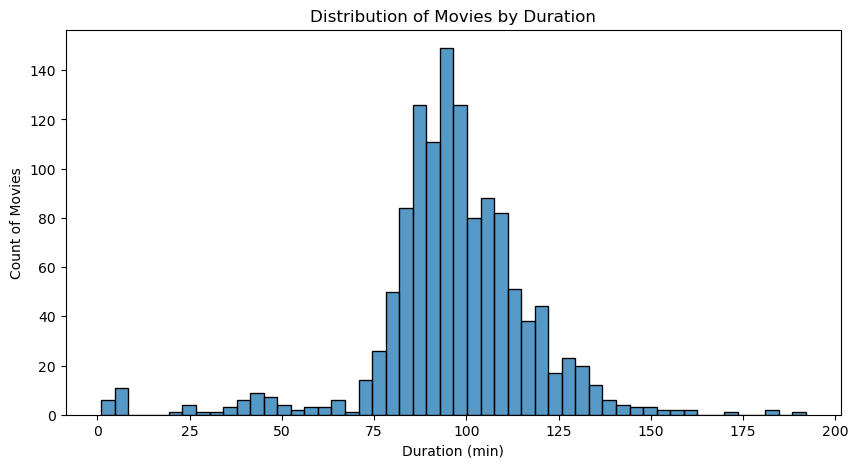

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 5))
sns.histplot(data=hulu_movies, x= 'duration')
plt.title('Distribution of Movies by Duration')
plt.xlabel('Duration (min)')
plt.ylabel('Count of Movies')
plt.show()

The "duration" distribution of movies appears to be normal, so the mean will be used to fill missing values.

In [26]:
hulu_movies['duration'] = hulu_movies['duration'].fillna( hulu_movies['duration'].mean() )
hulu_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1422 entries, 0 to 2993
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type                1422 non-null   object 
 1   title               1422 non-null   object 
 2   date_added          1422 non-null   object 
 3   release_year        1422 non-null   int64  
 4   rating              902 non-null    object 
 5   duration            1422 non-null   float64
 6   listed_in           1422 non-null   object 
 7   streaming_platform  1422 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 132.3+ KB


In [27]:
hulu_movies = hulu_movies.rename(columns={'duration': 'duration_minutes'})

In [28]:
hulu_movies['rating'].isna().sum()

520

The only missing data is now in the category rating. If all nulls are dropped, ~37% of the data is removed. This is not optimal, but much of the data for "ratings" was corrupted.

In [29]:
hulu_movies_final = hulu_movies.dropna()
hulu_movies_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 902 entries, 0 to 2982
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type                902 non-null    object 
 1   title               902 non-null    object 
 2   date_added          902 non-null    object 
 3   release_year        902 non-null    int64  
 4   rating              902 non-null    object 
 5   duration_minutes    902 non-null    float64
 6   listed_in           902 non-null    object 
 7   streaming_platform  902 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 63.4+ KB


## Exporting the Dataframes

Lastly, the cleaned dataframes will be exported for further evaluation.

In [30]:
hulu_movies_final.to_csv('Hulu_movies.csv', index = False)
hulu_tv_shows_final.to_csv('Hulu_tv_shows.csv', index = False)